In [1]:
## main script to test
import final_implementation as script
## some required imports
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# LaneProcessing object have the entire pipeline to make each processing step
laneProcessing = script.LanesProcessing('camera_cal/calibration*.jpg')

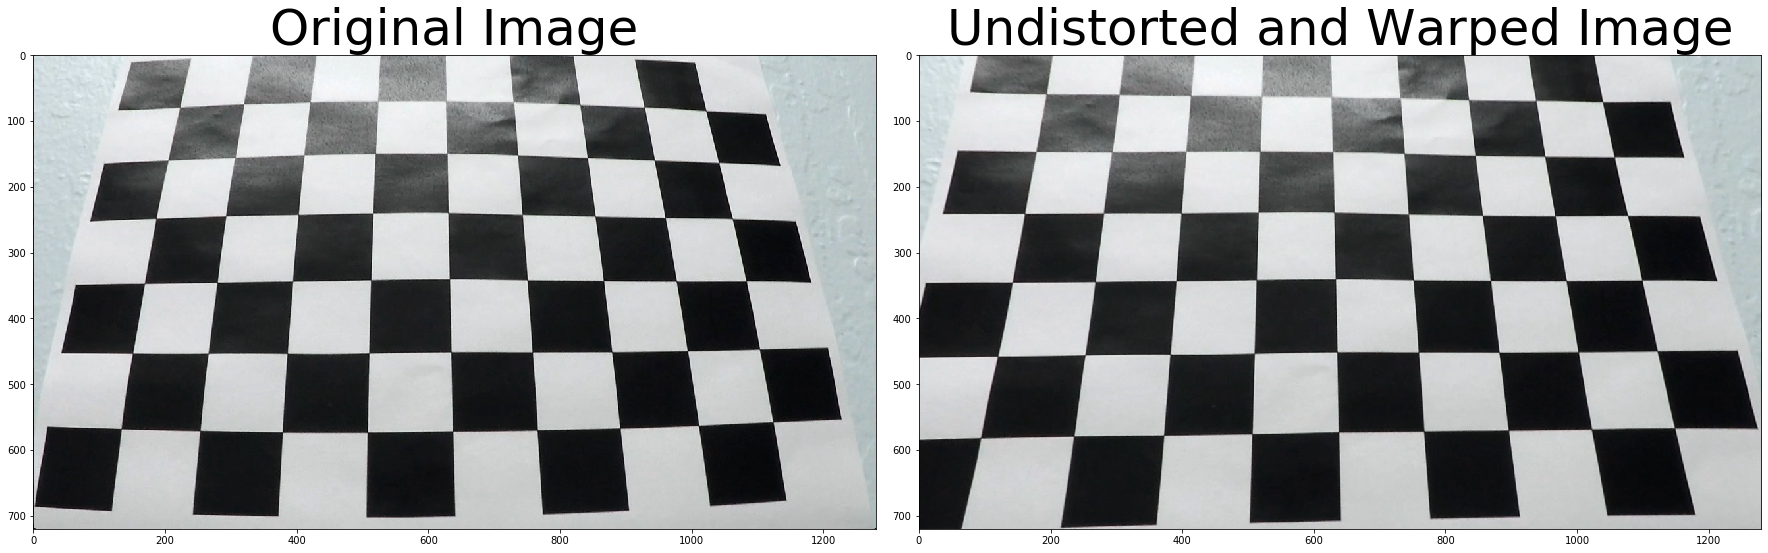

In [3]:
# Test Undistorted and Warped initialization
mtx, dist = (laneProcessing.mtx, laneProcessing.dist)

img_test = cv2.imread('camera_cal/calibration3.jpg')
dst = cv2.undistort(img_test, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Original Image', fontsize=50)
ax2.set_title('Undistorted and Warped Image', fontsize=50)

ax1.imshow(img_test)
ax2.imshow(dst)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

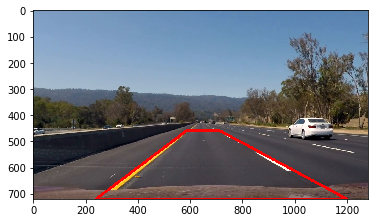

In [4]:
# Adjust parameters to get desired corners for bird_view
bgr_image = cv2.imread('./examples/project_images/img_360.jpg')
img = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]
mid_offset = 95
bottom_offset_left = 250
bottom_offset_right = 140
x_offset = -10

apex_offset = 100
y_apex = (height//2) + apex_offset

left_bottom = (0 + bottom_offset_left + x_offset, height)
right_bottom = (width - bottom_offset_right + x_offset + 70, height)
apex = (((width+100)//2)-mid_offset + x_offset, y_apex)
apex2 = (((width+100)//2)+mid_offset + x_offset - 60, y_apex)
corners = [left_bottom, right_bottom, apex2, apex]

regions = laneProcessing._draw_region(img, corners)
plt.figure()
plt.imshow(regions)

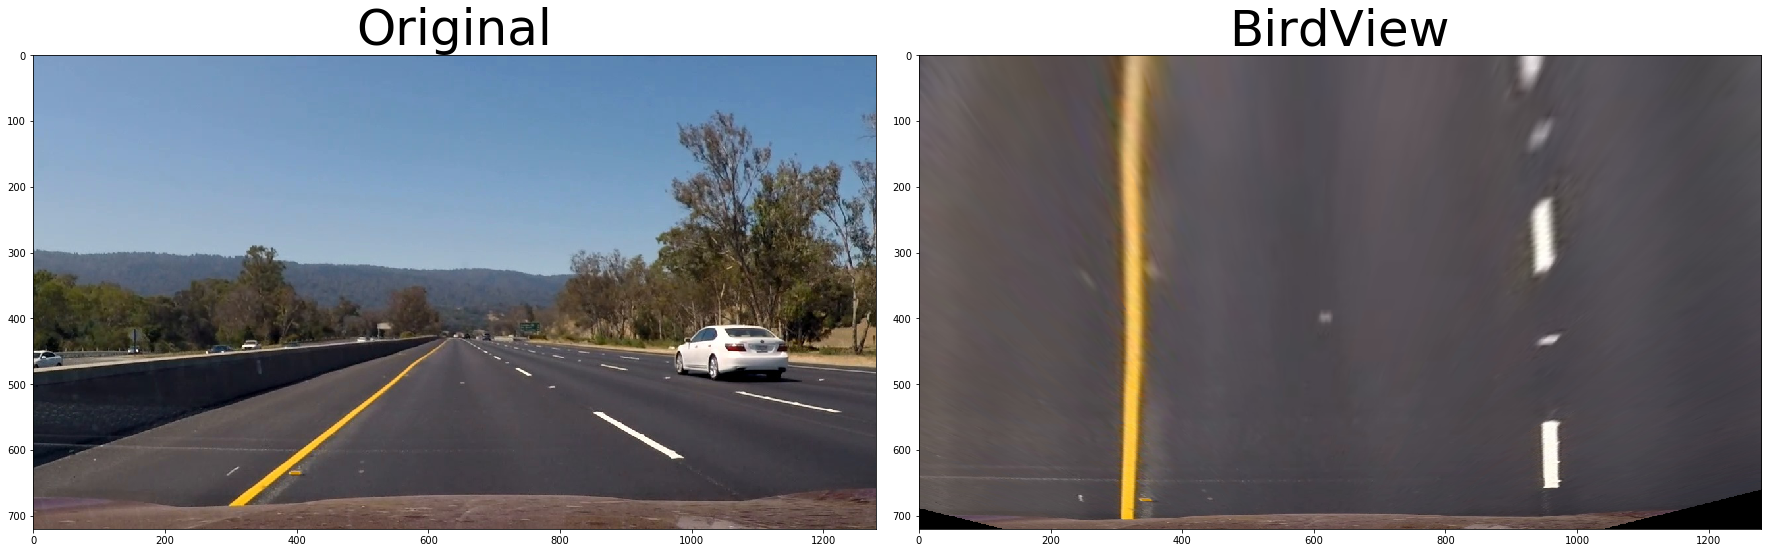

In [5]:
## Test bird_view function
img = cv2.imread('./examples/project_images/img_360.jpg')
result, M = laneProcessing._bird_view(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Original', fontsize=50)
ax2.set_title('BirdView', fontsize=50)

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

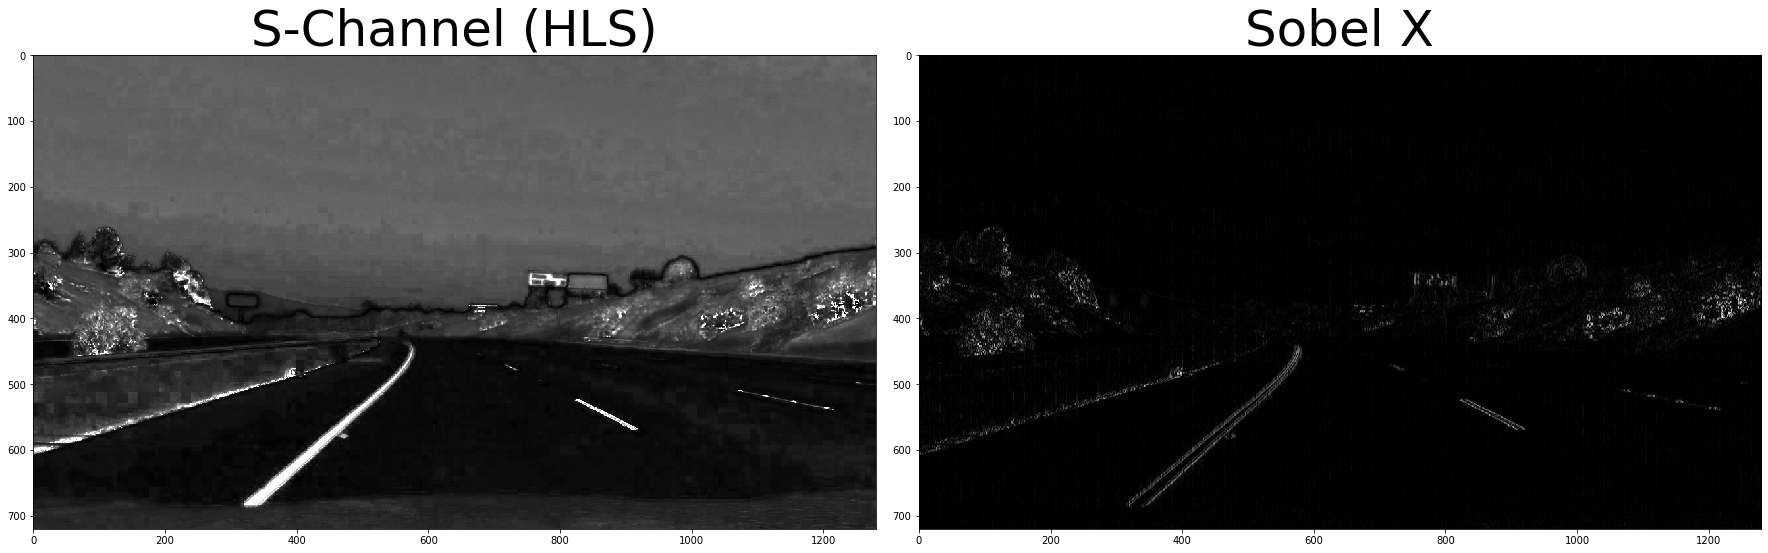

In [6]:
## Test Sobel X operation
img = cv2.imread('./examples/project_images/img_0.jpg')
hls_img_lane = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
selected_channel = hls_img_lane[:,:,2]
result = laneProcessing._sobel_x(selected_channel)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('S-Channel (HLS)', fontsize=50)
ax2.set_title('Sobel X', fontsize=50)

ax1.imshow(selected_channel, cmap='gray')
ax2.imshow(result, cmap='gray')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

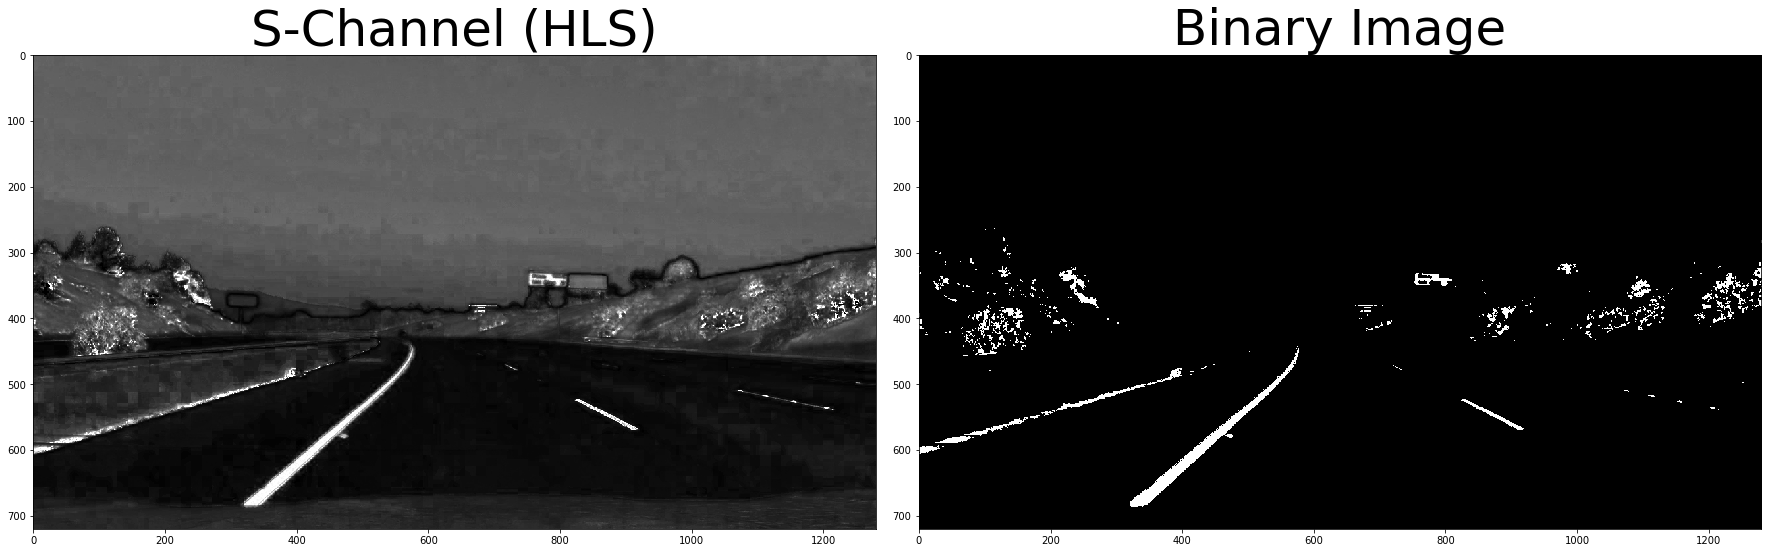

In [7]:
## Test Binary operation
img = cv2.imread('./examples/project_images/img_0.jpg')
hls_img_lane = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
selected_channel = hls_img_lane[:,:,2]

sbinary = laneProcessing._binary(selected_channel, 120, 255)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('S-Channel (HLS)', fontsize=50)
ax2.set_title('Binary Image', fontsize=50)

ax1.imshow(selected_channel, cmap='gray')
ax2.imshow(sbinary, cmap='gray')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

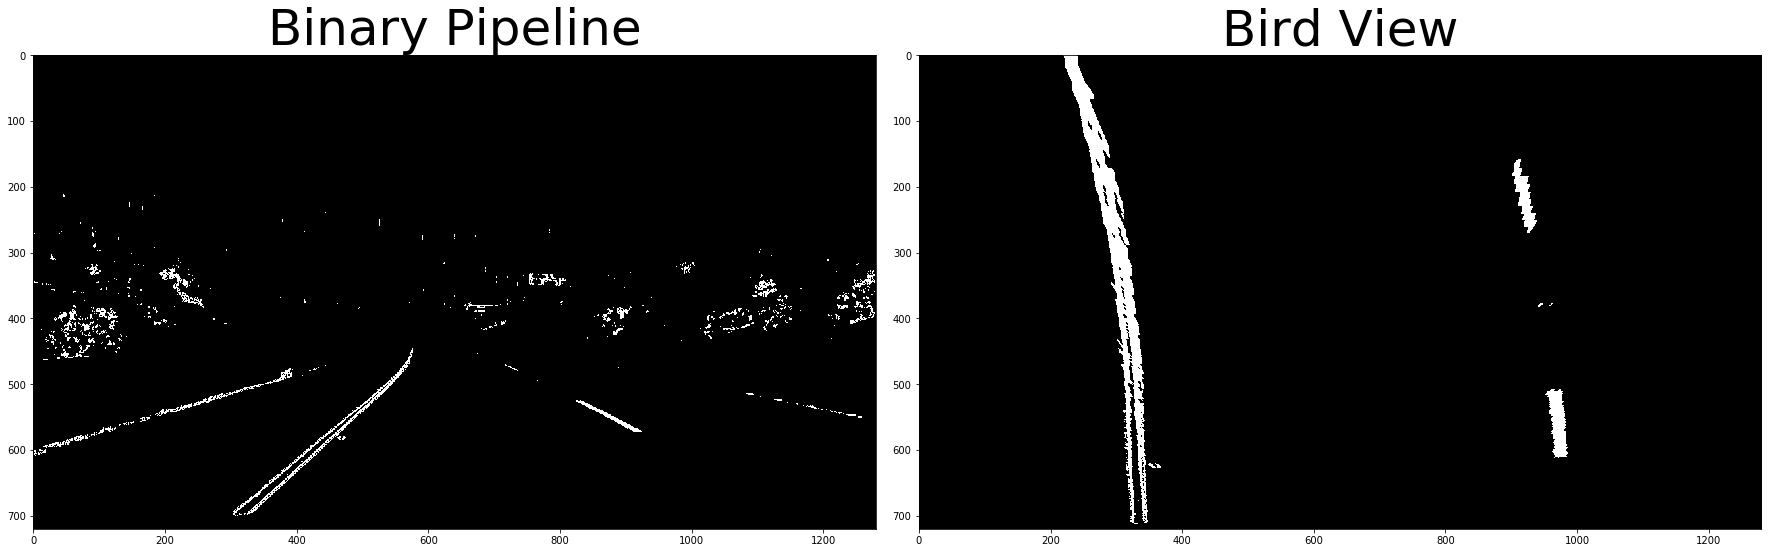

In [8]:
#Test Pipeline_binary
img = cv2.imread('./examples/project_images/img_0.jpg')
binary = laneProcessing._pipeline_binary(img)
bird_view, M = laneProcessing._bird_view(binary)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Binary Pipeline', fontsize=50)
ax2.set_title('Bird View', fontsize=50)

ax1.imshow(binary, cmap='gray')
ax2.imshow(bird_view, cmap='gray')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

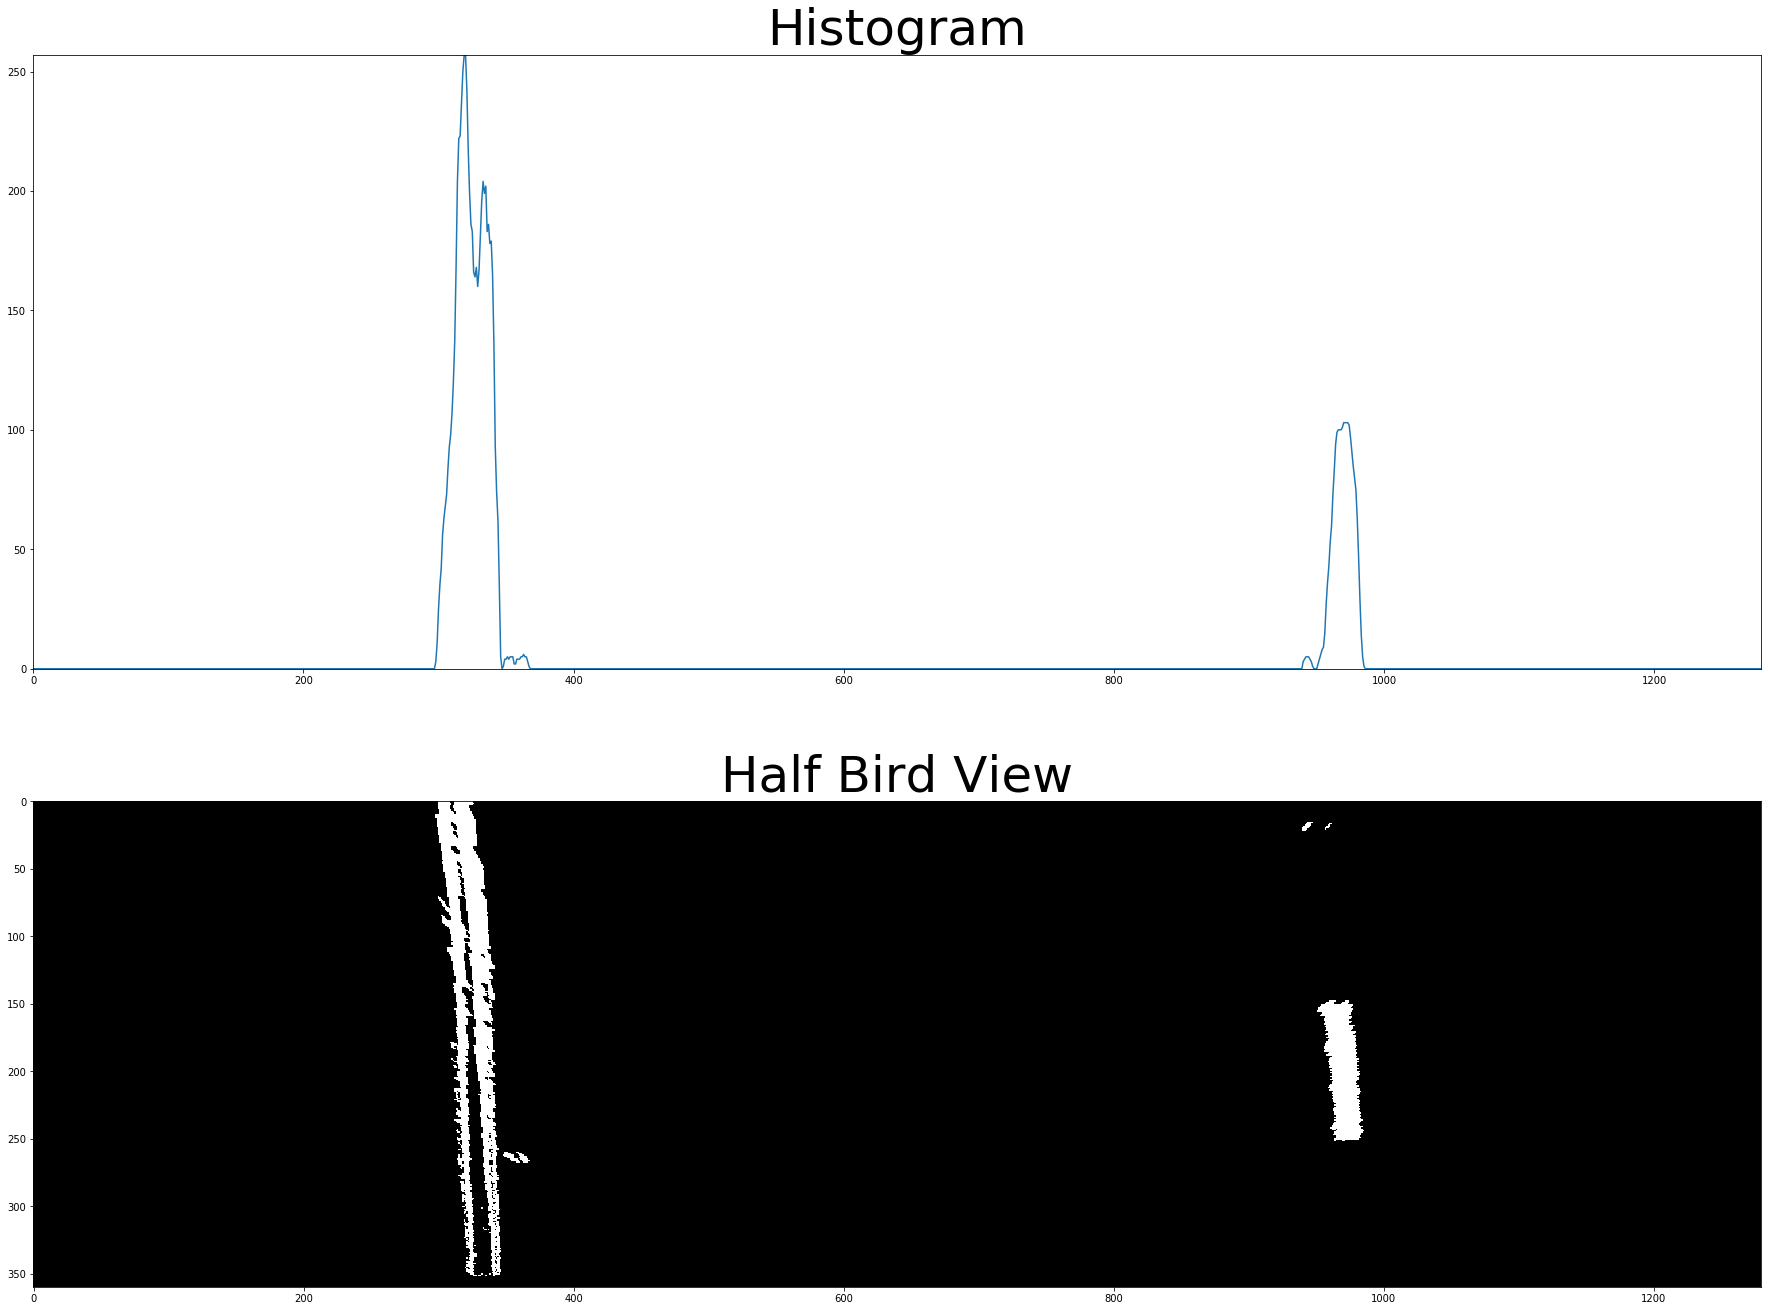

In [9]:
# Test left and right peak histogram operation
histogram, bottom_half = laneProcessing._lr_peaks_histogram(bird_view)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 9))
f.tight_layout()

ax1.set_title('Histogram', fontsize=50)
ax2.set_title('Half Bird View', fontsize=50)

ax1.margins(0)
ax1.plot(histogram)
ax2.imshow(bottom_half, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=2, bottom=0.)

In [10]:
script.main()

In [11]:
# script.generate_bird_view_video()